AQUI HACEMOS CONVERSIONES CSV DE LOS DATOS GENERALES DE MEDICIONES EN CONJUNTO, LIMPIAMOS Y ACOMODAMOS
EL FORMATO DE GECHA PARA TENER UNA MEJOR MANIPULACIÓN

CONVERION TXT A CSV

In [14]:
import os
import pandas as pd

dispositivo = 'Datos_generales' #CAMBIA AL DISPOSITIVO EL CUAL REQUIERES 
variable = 'Corriente_linea1' #CAMBIA LA VARIALE AL CUAL QUIERES CONCATENAR USALMENTE ES CORRIENTE


directory = f"Datos_generales/{variable}"
output_csv = f"{dispositivo}_{variable}.csv" #NO CAMBIAR ES LA RUTA DE SALIDA



def concat_txt_to_csv(directory, output_csv):
    # Lista para almacenar los datos de todos los archivos
    data_frames = []
    
    # ITERAR SOBRE LOS ARCHIVO DE LA CARPETA
    for file in os.listdir(directory):
        if file.endswith(".txt"):
            file_path = os.path.join(directory, file)
            print(f"Leyendo archivo: {file_path}")
            
            # LEER CADA ARCHIVOS TXT EN UN DATAFRAME
            df = pd.read_csv(file_path, header=None)  # Ajusta el delimitador si es necesario
            data_frames.append(df)
    
    # CONCATENAR TODOS LOS ARCHIVOS ES UNO 
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # GUARDAR DATA FRAME Y GUARDARLO EN UN CSV
    combined_df.to_csv(output_csv, index=False, header=False)
    print(f"Archivos concatenados guardados en: {output_csv}")

concat_txt_to_csv(directory, output_csv)




Leyendo archivo: Datos_generales/Corriente_linea1\2024-09-25 15.txt
Leyendo archivo: Datos_generales/Corriente_linea1\2024-09-25 16.txt
Archivos concatenados guardados en: Datos_generales_Corriente_linea1.csv


VISUALIZAMOS EL CONTENIDO CSV

In [15]:
import pandas as pd


df= pd.read_csv(f"{dispositivo}_{variable}.csv")
df.columns = ['fecha', f"{variable}"]
df.to_csv(f"{dispositivo}_{variable}.csv", index=False)


print(df.head())

                  fecha  Corriente_linea1
0  2024-09-25 15-00-1.0          0.937698
1  2024-09-25 15-00-1.8          0.937238
2  2024-09-25 15-00-2.6          0.937238
3  2024-09-25 15-00-3.4          0.938015
4  2024-09-25 15-00-4.3          0.937945


ACOMODAMOS EL FORMATO DE FECHA

In [20]:
import pandas as pd

# Cargar los datos desde un archivo CSV (ajusta la ruta si es necesario)
data = pd.read_csv(f"{dispositivo}_{variable}.csv")

# Eliminar los microsegundos (elimina la parte después del último punto)
data['fecha'] = data['fecha'].str.replace(r'\.\d+$', '', regex=True)

# Reemplazar los guiones por dos puntos en la parte de la hora (solo los últimos dos guiones)
data['fecha'] = data['fecha'].str.replace(r'(\d{2})-(\d{2})-(\d{1,2})$', r'\1:\2:\3', regex=True)

# Convertir la columna 'fecha' a formato datetime, usando %S para segundos y %f para microsegundos
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d %H:%M:%S')

# Guardar el resultado en un nuevo archivo CSV
data.to_csv(f"{dispositivo}_{variable}.csv", index=False)

# Mostrar el DataFrame actualizado (opcional)
print(data.head())


                fecha  Corriente_linea1
0 2024-09-25 15:00:01          0.937698
1 2024-09-25 15:00:01          0.937238
2 2024-09-25 15:00:02          0.937238
3 2024-09-25 15:00:03          0.938015
4 2024-09-25 15:00:04          0.937945


In [21]:
print(data.head())

                fecha  Corriente_linea1
0 2024-09-25 15:00:01          0.937698
1 2024-09-25 15:00:01          0.937238
2 2024-09-25 15:00:02          0.937238
3 2024-09-25 15:00:03          0.938015
4 2024-09-25 15:00:04          0.937945


vVISUALIZACI+ON DE DATOS GENERALES

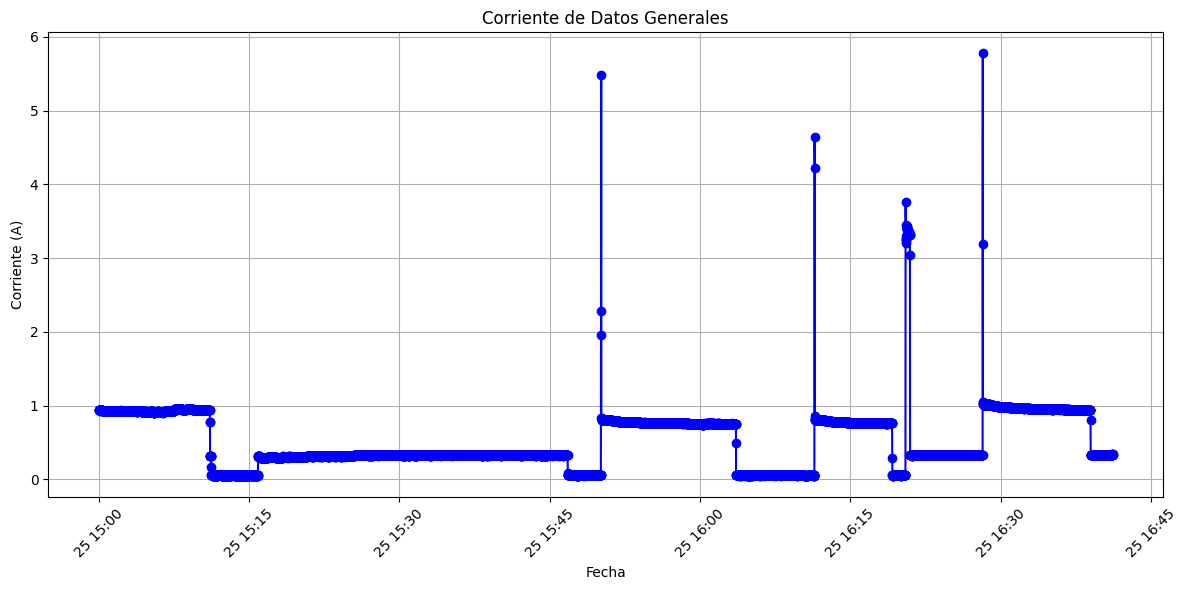

In [23]:
import pandas as pd
import matplotlib.pyplot as plt




    # Establecer la columna 'fecha' como índice
data.set_index('fecha', inplace=True)

# Verificar que el DataFrame no esté vacío
if not data.empty and 'Corriente_linea1' in data.columns:
    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Corriente_linea1'], marker='o', linestyle='-', color='b')  # Usar el índice directamente
    plt.title('Corriente de Datos Generales')
    plt.xlabel('Fecha')
    plt.ylabel('Corriente (A)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()
else:
    print("No hay datos disponibles para graficar.")
